# Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# What are convolutions and maxpool layers?
## load examples

We start by loading two sample images

In [2]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
images.shape

(2, 427, 640, 3)

## create filters
Now, we make two filters by hand. One with a horizontal line, one with a vertical line.

In [3]:
# Create 2 filters. The shape will be (kernel x kernel x channels x filters)
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line
filters[:, :, 0, 0] # have a look at the 0th filter in the 0th channel

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

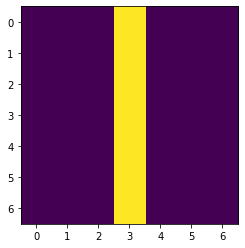

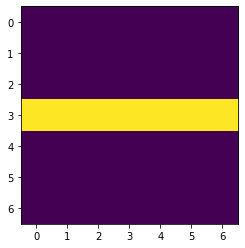

In [4]:
# and visualize them
plt.imshow(filters[:, :, 0, 0])
plt.show()
plt.imshow(filters[:, :, 0, 1])

## Conv2D layers
Now we feed these filters to the images. The will be "slided" over the image, moving one pixel to the right. The filter calculates the values, and outputs the "resume" of this pattern as a single number. A convolution can be thought of as a "pattern detector", that detects patterns across bigger areas of pixels (to be exact, in the kernel size), in this example a 7x7 kernel.

In [5]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

2021-08-17 18:09:22.188174: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now, let's zoom in a little bit to see it more clearly. You can probably guess which filter does what.

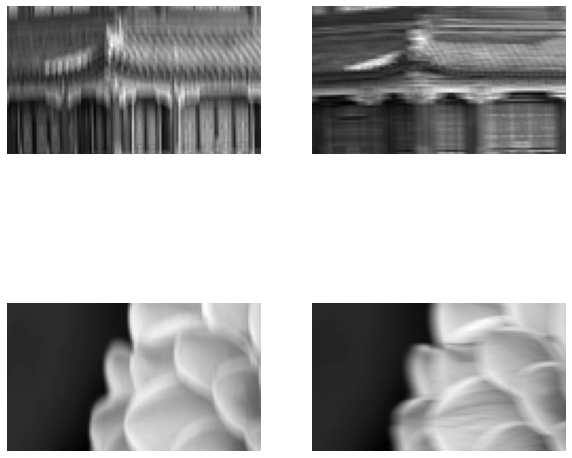

In [6]:
def crop(images):
    return images[150:220, 130:250]

plt.figure(figsize=(10, 10))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        #plt.imshow(image, cmap="gray", interpolation="nearest")
        plt.imshow(crop(outputs[image_index, :, :, feature_map_index]), cmap='gray')
        plt.axis("off")

## Maxpool
We started with one image (or, better put: one images on three channels). The convulution looks for patterns and highlights them. The output are two images, one for every type of filter. This is increasing the amount of information we have to process. E.g., we had (batch x height x width x channels), and now we have (batch x height x width x filters), where filters can be 64 or 128 etc. So we would want to reduce the amount of information. 

That is where **maxpooling** comes in. The idea is kind of simple: just take a small window of pixels (e.g. a 2 by 2 window) and take the maximum value inside that window. Throw away everything else. Where we had height x width, we end up with an image only a quarter of the original size (because both height and width got sliced into halves).

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

max_pool = MaxPool2D(pool_size=2)
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)
cropped_images.shape, output.shape

((2, 70, 120, 3), TensorShape([2, 35, 60, 3]))

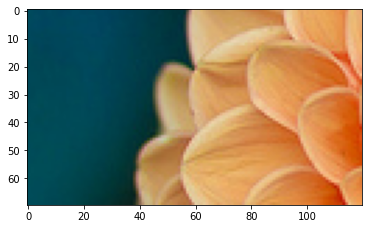

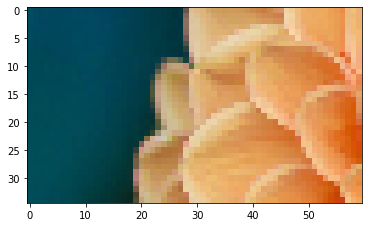

In [8]:
plt.imshow(cropped_images[1])
plt.show()
plt.imshow(output[1]) 